Notebook summary:
- First look at exercise data
- Examines possible values for each column
- Quality control: Check levels of RNA (including mitochondrial RNA) and genes across the 4 test groups to make sure they're relatively similar and aren't contaminated
- Calculates transcriptional noise
- Plots included in the notebook:
    Bar plot: used for quality control and p values of
    Volcano plot: plots log fold between two groups

In [1]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed



In [2]:
library(pheatmap)

In [ ]:
filename <- "/gpfs/home/meyin/published_data/parabiosis/pb_combined.rds?download=1"
data <- readRDS(filename)

In [ ]:
# Quality Control

In [ ]:
metadata <- data@meta.data %>% filter(data@meta.data$Celltype != "Doublet")

In [5]:
# Split off Old Control data
ocontroldata <- metadata %>% filter(AgeCond=="O_Control")
head(ocontroldata)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.4,seurat_clusters,ID,Tissue,⋯,Condition,Weight,Age,AgeCond,Dissection,S.Score,G2M.Score,Phase,Celltype,Celltype.LowRes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
AAACCCAAGCCTTTCC_1,O2_SVZ_R2_D1_Control_33.6,6084,2418,5.046022,6152,2418,1,1,O2,SVZ,⋯,Control,33.6,O,O_Control,MB,-0.04462565,-0.09184528,G1,Astrocyte,Astrocyte_qNSC
AAACCCAAGCGCCGTT_1,O2_SVZ_R2_D1_Control_33.6,9814,3131,5.726513,7086,3088,6,6,O2,SVZ,⋯,Control,33.6,O,O_Control,MB,-0.01115904,-0.11240861,G1,Oligodendro_2,Oligodendro
AAACCCACATGCACTA_1,O2_SVZ_R2_D1_Control_33.6,11254,2829,6.140039,6983,2586,0,0,O2,SVZ,⋯,Control,33.6,O,O_Control,MB,-0.05598174,-0.10543268,G1,Microglia_1,Microglia
AAACCCAGTACCGTCG_1,O2_SVZ_R2_D1_Control_33.6,11185,3357,6.785874,7120,3146,4,4,O2,SVZ,⋯,Control,33.6,O,O_Control,MB,-0.11305243,-0.08205005,G1,Oligodendro_1,Oligodendro
AAACCCAGTCACCGCA_1,O2_SVZ_R2_D1_Control_33.6,5932,2677,3.371544,6019,2677,10,10,O2,SVZ,⋯,Control,33.6,O,O_Control,MB,-0.09697635,-0.16882901,G1,Pericyte,Mural
AAACCCAGTCCTACAA_1,O2_SVZ_R2_D1_Control_33.6,9204,3124,4.019991,7183,3100,1,1,O2,SVZ,⋯,Control,33.6,O,O_Control,MB,-0.06732660,-0.08756857,G1,Astrocyte,Astrocyte_qNSC


In [6]:
# Split off Old Exercise data
oexercisedata <- metadata %>% filter(AgeCond=="O_Exercise")
head(oexercisedata)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.4,seurat_clusters,ID,Tissue,⋯,Condition,Weight,Age,AgeCond,Dissection,S.Score,G2M.Score,Phase,Celltype,Celltype.LowRes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
AAACCCAAGTAATCCC_2,O3_SVZ_R2_D1_Exercise_39.3,7667,2780,3.678101,6903,2780,4,4,O3,SVZ,⋯,Exercise,39.3,O,O_Exercise,LX,-0.01244319,-0.08772334,G1,Oligodendro_1,Oligodendro
AAACCCACAGTTAGGG_2,O3_SVZ_R2_D1_Exercise_39.3,4144,1216,2.364865,5891,1216,11,11,O3,SVZ,⋯,Exercise,39.3,O,O_Exercise,LX,-0.03928175,-0.11331559,G1,Microglia_2,Microglia
AAACCCATCGGACGTC_2,O3_SVZ_R2_D1_Exercise_39.3,8899,3906,4.056636,7330,3894,12,12,O3,SVZ,⋯,Exercise,39.3,O,O_Exercise,LX,-0.10379217,-0.12068935,G1,OPC_1,OPC
AAACGAACACAAGCCC_2,O3_SVZ_R2_D1_Exercise_39.3,2071,1141,9.512313,5185,1454,5,5,O3,SVZ,⋯,Exercise,39.3,O,O_Exercise,LX,0.02454746,-0.06933995,S,Neuroblast_2,Neuroblast
AAACGAACACGGGTAA_2,O3_SVZ_R2_D1_Exercise_39.3,9916,2765,5.859217,6967,2678,0,0,O3,SVZ,⋯,Exercise,39.3,O,O_Exercise,LX,-0.05692550,-0.14237267,G1,Microglia_1,Microglia
AAACGAAGTGCCTGAC_2,O3_SVZ_R2_D1_Exercise_39.3,9036,3053,3.253652,7087,3043,3,3,O3,SVZ,⋯,Exercise,39.3,O,O_Exercise,LX,0.06551872,-0.09270917,S,Neuroblast_1,Neuroblast


In [7]:
# Split off Young Control data
ycontroldata <- metadata %>% filter(AgeCond=="Y_Control")
head(ycontroldata)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.4,seurat_clusters,ID,Tissue,⋯,Condition,Weight,Age,AgeCond,Dissection,S.Score,G2M.Score,Phase,Celltype,Celltype.LowRes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
AAACCCAAGATGTTCC_8,Y1_SVZ_R2_D1_Control_NA,6980,2601,6.461318,6688,2601,6,6,Y1,SVZ,⋯,Control,NA,Y,Y_Control,LX,-0.03108034,-0.05122604,G1,Oligodendro_2,Oligodendro
AAACGAAGTGAGTGAC_8,Y1_SVZ_R2_D1_Control_NA,9338,3132,5.418719,7092,3114,7,7,Y1,SVZ,⋯,Control,NA,Y,Y_Control,LX,-0.12070416,-0.06269443,G1,Oligodendro_3,Oligodendro
AAACGAATCGGTGTAT_8,Y1_SVZ_R2_D1_Control_NA,8562,3818,2.861481,7285,3818,12,12,Y1,SVZ,⋯,Control,NA,Y,Y_Control,LX,-0.15204941,-0.17137536,G1,OPC_1,OPC
AAACGCTCAAGCAGGT_8,Y1_SVZ_R2_D1_Control_NA,10187,2871,2.139982,7005,2763,0,0,Y1,SVZ,⋯,Control,NA,Y,Y_Control,LX,-0.04820906,-0.14978192,G1,Microglia_1,Microglia
AAACGCTGTGAGCAGT_8,Y1_SVZ_R2_D1_Control_NA,10832,3362,4.080502,7127,3197,7,7,Y1,SVZ,⋯,Control,NA,Y,Y_Control,LX,-0.10569370,-0.06074451,G1,Oligodendro_3,Oligodendro
AAACGCTTCAAAGGTA_8,Y1_SVZ_R2_D1_Control_NA,8233,2963,1.506134,7043,2963,0,0,Y1,SVZ,⋯,Control,NA,Y,Y_Control,LX,-0.06411290,-0.09856547,G1,Microglia_1,Microglia


In [8]:
# Split off Young Exercise data
yexercisedata <- metadata %>% filter(AgeCond=="Y_Exercise")
head(yexercisedata)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.4,seurat_clusters,ID,Tissue,⋯,Condition,Weight,Age,AgeCond,Dissection,S.Score,G2M.Score,Phase,Celltype,Celltype.LowRes
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<fct>,<fct>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
AAACCCACAAAGAGTT_10,Y3_SVZ_R2_D1_Exercise_28.5,4097,1896,4.271418,5614,1898,5,5,Y3,SVZ,⋯,Exercise,28.5,Y,Y_Exercise,LX,-0.04153015,-0.04423017,G1,Neuroblast_2,Neuroblast
AAACCCATCGTAACAC_10,Y3_SVZ_R2_D1_Exercise_28.5,4738,1737,3.102575,5753,1737,0,0,Y3,SVZ,⋯,Exercise,28.5,Y,Y_Exercise,LX,-0.04494784,-0.04581744,G1,Microglia_1,Microglia
AAACGAAAGCATGGGT_10,Y3_SVZ_R2_D1_Exercise_28.5,3362,1739,6.276026,5492,1759,2,2,Y3,SVZ,⋯,Exercise,28.5,Y,Y_Exercise,LX,-0.01337188,-0.09990717,G1,Endothelial,Endothelial
AAACGAAAGGGCGAGA_10,Y3_SVZ_R2_D1_Exercise_28.5,3562,1254,5.951713,5702,1282,16,16,Y3,SVZ,⋯,Exercise,28.5,Y,Y_Exercise,LX,-0.04018425,-0.04866340,G1,Macrophage,Macrophage
AAACGAACAGAGTCTT_10,Y3_SVZ_R2_D1_Exercise_28.5,40896,6251,4.328052,7698,2714,15,15,Y3,SVZ,⋯,Exercise,28.5,Y,Y_Exercise,LX,-0.12138571,-0.13272230,G1,OPC_2,OPC
AAACGAAGTGTACATC_10,Y3_SVZ_R2_D1_Exercise_28.5,3284,1637,6.851401,5387,1709,1,1,Y3,SVZ,⋯,Exercise,28.5,Y,Y_Exercise,LX,-0.01694074,-0.05768578,G1,Astrocyte,Astrocyte_qNSC


In [9]:
# Look at differences in transcriptional noise in different cell types + see how they change with age

In [10]:
seurat_list <- SplitObject(data, split.by = "ID")

In [11]:
initial_matrices <- lapply(seurat_list, function(x) GetAssayData(x, slot = "data"))

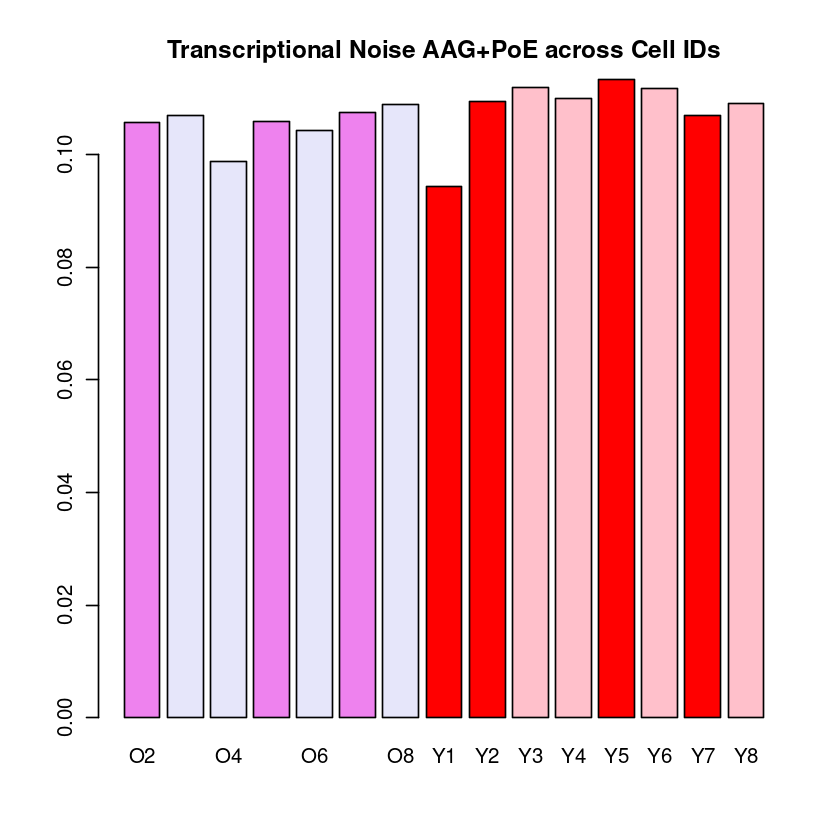

In [12]:
# Find transcriptional noise across all individuals and compare
noiselist <- c();

idlist <- c("O2", "O3", "O4", "O5", "O6", "O7", "O8", "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8");

experimentalgroup <- c("old control", "old exercise", "old exercise", "old control", "old exercise", "old control", "old exercise", 
         "young control", "young control", "young exercise", "young exercise", "young control", "young exercise", "young control", "young exercise");

cols <- c("violet", "lavender", "lavender", "violet", "lavender", "violet", "lavender",
          "red", "red", "pink", "pink", "red", "pink", "red", "pink")

for (x in 1:15) {
    noise <- (seurat_list[[x]]$nCount_SCT %>% sd())/(seurat_list[[x]]$nCount_SCT %>% mean())
    noiselist <- c(noiselist, noise)
}

barplot(main=paste("Transcriptional Noise AAG+PoE across Cell IDs"),
        height=noiselist, 
        ylim = c(0, round(max(noiselist), 2)),
        names = idlist,
        col = cols)


In [13]:
calculateNoise <- function(gene){
sd(gene)/mean(gene)
}

In [14]:
# For each matrix in initial_matrices, go row by row (gene by gene) and calculate noise for that gene
noiseDistributions <- lapply(initial_matrices, function(matrix) {
apply(matrix, MARGIN = 2, FUN = calculateNoise)
})

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.1 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.0 GiB”


In [15]:
# Convect noiseDistributions to a dataframe again
noiseDistributions_asDF <- do.call(rbind, lapply(seq_along(noiseDistributions), function(i) {
  data.frame(ID = names(noiseDistributions)[i], Value = noiseDistributions[[i]])
}))

In [16]:
head(noiseDistributions_asDF)

,ID,Value
,<chr>,<dbl>
AAACCCAAGCCTTTCC_1,O2,2.862303
AAACCCAAGCGCCGTT_1,O2,2.509027
AAACCCACATGCACTA_1,O2,2.916677
AAACCCAGTACCGTCG_1,O2,2.493363
AAACCCAGTCACCGCA_1,O2,2.667899
AAACCCAGTCCTACAA_1,O2,2.471349


In [17]:
medians <- noiseDistributions_asDF %>%
  group_by(ID) %>%
  summarize(MedianValue = median(Value, na.rm = TRUE))
medians

ID,MedianValue
<chr>,<dbl>
O2,2.793473
O3,2.806000
O4,2.642484
O5,2.849036
O6,2.813532
O7,3.038761
O8,3.010058
Y1,2.663116
Y2,2.907050


In [18]:
medians <- medians %>%
  mutate(ExperimentalGroup = experimentalgroup)

In [19]:
idstoname <- function(ids) {
    ids <- unlist(strsplit(ids, "/"))
    genenames <- mapIds(org.Mm.eg.db, keys = ids, column = "SYMBOL", keytype = "ENTREZID", multiVals = "first")
    paste(genenames, collapse = "/")
}

In [111]:
differentially_expressed_genes_old <- c()
differentially_expressed_genes_young <- c()

list_of_cell_specific_de_results_OLD <- data.frame()
list_of_cell_specific_de_results_YOUNG <- data.frame()

significant_genes_celltype_specific_OLD <- c()
significant_genes_celltype_specific_YOUNG <- c()

In [33]:
celltypes <- unique(data@meta.data$Celltype.LowRes)

In [ ]:
controlid <- c("O2", "O5", "O7")
exerciseid <- c("O3", "O4", "O6", "O8")
controlname <- "OldControl"
exercisename <- "OldExercise"
prefix <- "Old"

metadata$group <- ifelse(metadata$ID %in% controlid, controlname, 
                     ifelse(metadata$ID %in% exerciseid, exercisename, NA))
data@meta.data <- metadata

# get list of important genes for old
old_de_results <- FindMarkers(data, ident.1 = exercisename, ident.2 = controlname, group.by = "group", logfc.threshold = 0)
old_de_results <- old_de_results %>%
                mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))

old_significant_data <- old_de_results %>% filter(significant == "yes")

old_significant_genes <- rownames(old_significant_data)

In [71]:
# iterate through all cell types, get the de_results, add to list of de results
for (celltype in celltypes) {
    prefix <- "Old"

    print(celltype)
    prefix = paste(celltype, prefix)
    
    de_results <- FindMarkers(subset(data, subset = Celltype.LowRes == celltype), ident.1 = exercisename, ident.2 = controlname, group.by = "group", logfc.threshold = 0)
    de_results <- de_results %>%
                    mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))
    significantdata <- de_results %>% filter(significant == "yes")
    
    significantgenes <- rownames(significantdata)

    df_with_genes <- de_results %>%
      rownames_to_column(var = "gene")
    
    df_with_genes <- df_with_genes %>%
      filter(gene %in% old_significant_genes)
    
    df_with_genes["Cell_Type"] <- celltype
    
    list_of_cell_specific_de_results_OLD <- rbind(list_of_cell_specific_de_results_OLD, df_with_genes)
    
    significant_genes_celltype_specific_OLD <- c(significant_genes_celltype_specific_OLD, significantgenes)
}

[1] "Astrocyte_qNSC"
[1] "Oligodendro"
[1] "Microglia"
[1] "Mural"
[1] "Endothelial"
[1] "aNSC_NPC"
[1] "Neuroblast"
[1] "Macrophage"
[1] "OPC"
[1] "Neuronal"
[1] "T_Cell"
[1] "Vascular_Leptomeningeal"
[1] "Epithelial"
[1] "Ependymal"


In [99]:
wide_data <- list_of_cell_specific_de_results_OLD %>%
  select(gene, Cell_Type, avg_log2FC) %>%
  pivot_wider(names_from = Cell_Type, values_from = avg_log2FC)

wide_data <- wide_data %>%
  mutate(across(everything(), ~ replace_na(., 0)))

wide_data_df <- as.data.frame(wide_data)

rownames(wide_data_df) <- wide_data_df$gene

wide_data_df <- wide_data_df %>%
  select(-gene)

In [108]:
dim(wide_data_df)

[1] 107  14

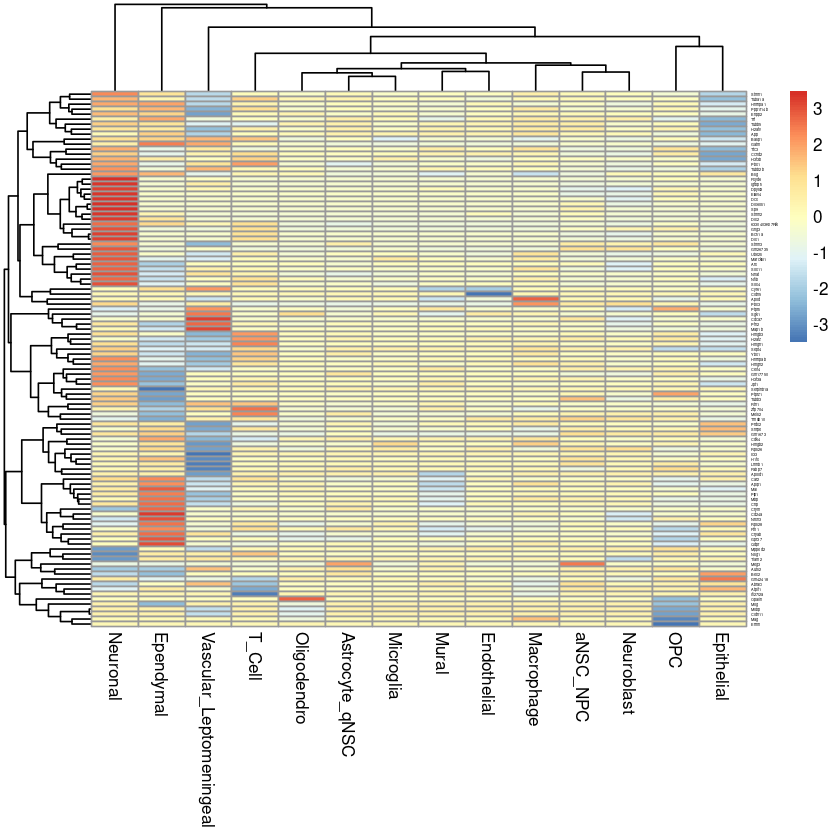

In [107]:
pheatmap(as.matrix(wide_data_df), 
         scale = "row", 
         clustering_distance_rows = "euclidean", 
         clustering_distance_cols = "euclidean",
         clustering_method = "complete",
         fontsize_row = 2,
         fontsize_col = 10 
)

In [ ]:
controlid <- c("Y1", "Y2", "Y5", "Y7")
exerciseid <- c("Y3", "Y4", "Y6", "Y8")
controlname <- "YoungControl"
exercisename <- "YoungExercise"
prefix <- "Young"


metadata$group <- ifelse(metadata$ID %in% controlid, controlname, 
                     ifelse(metadata$ID %in% exerciseid, exercisename, NA))
data@meta.data <- metadata

young_de_results <- FindMarkers(data, ident.1 = exercisename, ident.2 = controlname, group.by = "group", logfc.threshold = 0)
young_de_results <- de_results %>%
                mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))

young_significant_data <- young_de_results %>% filter(significant == "yes")

young_significant_genes <- rownames(young_significant_data)


# iterate through all cell types, get the de_results, add to list of de results
for (celltype in celltypes) {
    prefix <- "Young"

    print(celltype)
    prefix = paste(celltype, prefix)
    
    de_results <- FindMarkers(subset(data, subset = Celltype.LowRes == celltype), ident.1 = exercisename, ident.2 = controlname, group.by = "group", logfc.threshold = 0)
    de_results <- de_results %>%
                    mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))
    significantdata <- de_results %>% filter(significant == "yes")
    
    significantgenes <- rownames(significantdata)

    significantgenes <- rownames(significantdata)

    df_with_genes <- de_results %>%
      rownames_to_column(var = "gene")
    
    df_with_genes <- df_with_genes %>%
      filter(gene %in% young_significant_genes)
    
    df_with_genes["Cell_Type"] <- celltype
    
    rbind(list_of_cell_specific_de_results_YOUNG, df_with_genes)
    
    significant_genes_celltype_specific_YOUNG <- c(significant_genes_celltype_specific_YOUNG, significantgenes)
}

In [ ]:
# create a heatmap where each column has a specific cell type and each row has a specific gene